<a href="https://colab.research.google.com/github/lama-a1/IT326-Project-Fitness/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *IT326* *Project* - *Phase2*

---



*This phase aims to explore and preprocess the dataset using techniques like visualization, outlier detection, handling missing values, normalization, and *feature selection* to enhance data quality and prepare it for further analysis.*


---



### **Creating Sample** *:*

---



In [1]:
import warnings
import pandas as pd

fitness_df = pd.read_csv("fitness_dataset.csv")

In [2]:
# Filter the data
fit_ones = fitness_df[fitness_df['is_fit'] == 1]
fit_zeros = fitness_df[fitness_df['is_fit'] == 0]

# Calculate remaining sample size
remaining_sample_size = 1000 - len(fit_ones)

# Sample from the non-fit group
fit_zeros_sample = fit_zeros.sample(n=remaining_sample_size, random_state=42)

# Combine the two groups
sample = pd.concat([fit_ones, fit_zeros_sample], ignore_index=True)

# Display the sample
display(sample)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
3,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1
4,38,188,57,81.2,110.6,6.6,8.47,4.96,0,M,1
...,...,...,...,...,...,...,...,...,...,...,...
995,36,193,101,88.1,132.9,6.1,3.06,2.42,yes,M,0
996,79,160,57,55.4,102.4,6.1,6.31,1.19,yes,M,0
997,42,158,117,74.7,135.2,9.2,9.43,1.13,0,M,0
998,76,162,63,82.4,102.0,8.0,5.11,1.85,0,F,0


#### **Duplicates** *v*

*This code checks if the dataset contains any duplicate rows that have the same values across all columns.*

---





In [3]:
duplicates_sum = sample.duplicated().sum()
print(duplicates_sum)

0


### **Missing values** *v*
*The dataset shows 79 missing values records in the *sleep_hours* column.*

---




In [4]:
missing_values = sample.isna()
missing_counts = missing_values.sum()
print(missing_counts)

age                   0
height_cm             0
weight_kg             0
heart_rate            0
blood_pressure        0
sleep_hours          79
nutrition_quality     0
activity_index        0
smokes                0
gender                0
is_fit                0
dtype: int64


## ***Statistical Summary***

#### *The following summarizes the main numeric attributes in the dataset, highlighting their ranges, averages, and key distribution points (Min, Q1, Q2, Q3, and Max):*


---


##### ***Using summary_stats function*** *v*
- Age:  
The ages range from 18 to 79 years, with an average of about 45.8 years. Half of the participants are between 30.8 and 60 years old, showing that the dataset covers multiple age groups but is centered more around middle-aged adults.  

- Height (cm):  
Heights range from 150 cm to 199 cm, with an average of 175.6 cm. The middle 50% of individuals fall between 163 cm and 188 cm, which represents typical adult heights.  

- Weight (kg):  
Weights range from 30 kg to 250 kg, with an average of 81.7 kg. Half of the individuals weigh between 63 kg and 98 kg. A few extremely high weights indicate the presence of outliers.  

- Heart Rate:  
The heart rate values range from 45 bpm to 118.6 bpm, with an average of 70.5 bpm. Most individuals fall between 62 bpm and 78 bpm, which is consistent with normal resting heart rates.  

- Blood Pressure:  
Blood pressure ranges from 90 to 171 mmHg, with an average of 119 mmHg. The middle 50% of individuals are between 110 mmHg and 129 mmHg, suggesting mostly normal values, with some higher outliers.  

- Sleep Hours:  
Sleep duration ranges from 4 to 12 hours, with an average of 7.6 hours. Half of the individuals sleep between 6.6 and 8.7 hours. However, this column contains about 79 missing values, which need to be addressed during preprocessing.  

- Nutrition Quality:  
Nutrition quality scores range from 0.07 to 10, with an average of 5.6. The middle 50% are between 3.2 and 8.3, showing diverse eating habits.  

- Activity Index:  
The activity index ranges from 1.0 to 4.99, with an average of 3.3. Half of the population scores between 2.5 and 4.3, indicating moderate to high activity levels.  

- is_fit (Class Label):  
The target variable ranges between 0 and 1. Around 80% of the individuals are fit (is_fit = 1), while about 20% are not fit (is_fit =0).

In [5]:
# Select numeric columns for summary
specific_columns = sample[['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index', 'is_fit']]
summary_stats = specific_columns.describe()
display(summary_stats)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,921.000000,1000.000000,1000.000000,1000.000000
mean,45.841000,175.599000,81.663000,70.519400,119.379100,7.625950,5.639110,3.322890,0.799000
std,17.549579,14.329953,23.916049,11.853176,14.429215,1.511194,2.844501,1.091133,0.400949
min,18.000000,150.000000,30.000000,45.000000,90.000000,4.000000,0.070000,1.010000,0.000000
25%,30.750000,163.000000,63.000000,61.900000,109.600000,6.600000,3.187500,2.487500,1.000000
50%,45.000000,176.000000,81.000000,70.400000,119.600000,7.600000,5.945000,3.430000,1.000000
75%,60.000000,188.000000,98.250000,78.900000,129.300000,8.700000,8.255000,4.282500,1.000000
max,79.000000,199.000000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


#### The Variance:

##### - Low Variance Attributes:  
Height, Heart Rate, Blood Pressure, Sleep Hours, and Activity Index: These attributes show similar values across individuals, suggesting that participants in the dataset have relatively close physical measurements and lifestyle indicators. Most people have comparable vital signs and sleeping patterns, reflecting consistency in these health-related variables.  

##### - High Variance Attributes:  
Weight and Nutrition Quality: These attributes exhibit a wide range of values, indicating significant differences in body composition and dietary quality among individuals. This means that while some people maintain a healthy weight and balanced nutrition, others may face challenges with weight management or diet quality.  

##### - Mixed Variance:  
Age: This attribute shows moderate variance, meaning that the dataset includes individuals from various age groups, though it is mainly centered around middle-aged participants.  

##### - Class Label (is_fit):  
This attribute shows low variance because the majority of participants are classified as “Fit.” The class balance shifted slightly, now 80% Fit and 20% Not Fit, which should be considered during preprocessing.


---



In [6]:
variance = specific_columns.var()
print(variance)

age                  307.987707
height_cm            205.347547
weight_kg            571.977408
heart_rate           140.497781
blood_pressure       208.202235
sleep_hours            2.283706
nutrition_quality      8.091184
activity_index         1.190572
is_fit                 0.160760
dtype: float64



# ***Graphs & Tables***


**The pie chart illustrates the proportion of individuals classified as “Fit” and “Not Fit.”**

From the chart, it’s clear that most participants fall under the “Fit” category, while the “Not Fit” group represents a smaller share. This visual highlights an imbalance in class distribution, suggesting the need to address class balance during preprocessing.


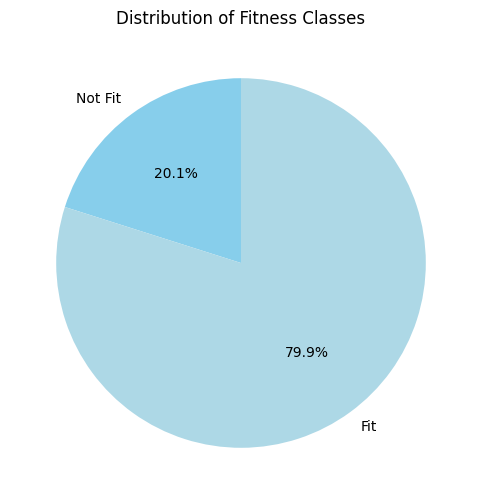

is_fit
0    201
1    799
Name: count, dtype: int64


,count
is_fit,
1,799
0,201


In [7]:
import matplotlib.pyplot as plt

fit_counts = sample['is_fit'].value_counts().sort_index()  # ensures 0 then 1 order
plt.figure(figsize=(6, 6))
plt.pie(fit_counts, labels=['Not Fit', 'Fit'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightblue'])
plt.title('Distribution of Fitness Classes')
plt.show()
print(fit_counts)
sample['is_fit'].value_counts()


**The bar chart illustrates the relationship between gender and fitness classification.**

The bar chart illustrates the relationship between gender and fitness classification. Both males and females show a higher number of “Fit” individuals, though males have a slightly greater count overall. This pattern indicates that fitness levels vary across genders, and minor category adjustments may be required during preprocessing.

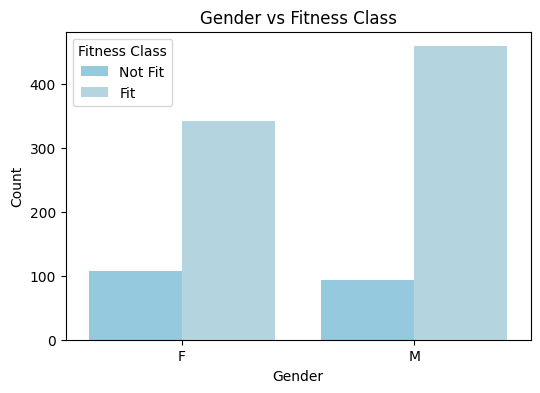

gender  is_fit
F       0         107
        1         341
M       0          94
        1         458
dtype: int64

In [8]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=sample, x='gender', hue='is_fit', palette=['skyblue', 'lightblue'])
plt.title("Gender vs Fitness Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Fitness Class", labels=['Not Fit','Fit'])
plt.show()
sample.groupby(['gender', 'is_fit']).size()


**The bar chart displays the relationship between smoking status and fitness classification.**

The bar chart compares fitness levels between smokers and non-smokers. Non-smokers are more often classified as “Fit,” while smokers are predominantly “Not Fit.” This suggests a negative association between smoking and fitness, emphasizing the importance of clean and consistent categorical encoding in preprocessing.

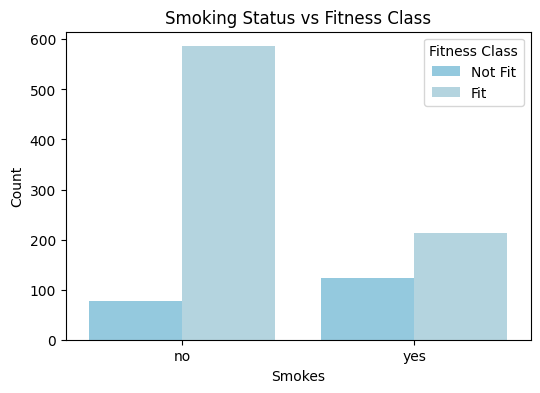

smokes  is_fit
no      0          77
        1         586
yes     0         124
        1         213
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the 'smokes' column
sample['smokes'] = sample['smokes'].astype(str).str.strip().str.lower()
sample['smokes'] = sample['smokes'].replace({
    '1': 'yes', '0': 'no', 'true': 'yes', 'false': 'no'
})

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=sample, x='smokes', hue='is_fit',
              order=['no','yes'],
              palette=['skyblue', 'lightblue'])
plt.title("Smoking Status vs Fitness Class")
plt.xlabel("Smokes")
plt.ylabel("Count")
plt.legend(title="Fitness Class", labels=['Not Fit','Fit'])
plt.show()
sample.groupby(['smokes', 'is_fit']).size()


**The boxplot compares heart rate distributions between “Fit” and “Not Fit” individuals.**

 “Fit” participants generally show lower heart rates, while “Not Fit” individuals have higher and more variable rates. This indicates potential outliers and highlights the need for preprocessing steps like **outlier handling** and **scaling** to prepare the data for modeling.

<Figure size 600x400 with 0 Axes>

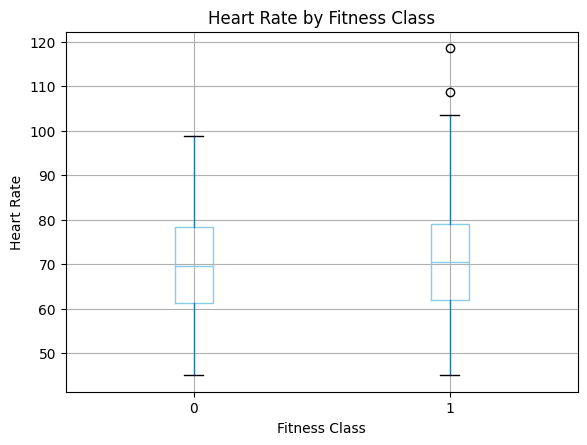

,count,mean,std,min,25%,50%,75%,max
is_fit,,,,,,,,
0,201.0,69.545771,12.005644,45.0,61.30,69.7,78.40,98.8
1,799.0,70.764330,11.809458,45.0,62.05,70.6,79.05,118.6


In [10]:
import matplotlib.pyplot as plt

# Boxplot for Heart Rate by Fitness Class
plt.figure(figsize=(6,4))
sample.boxplot(column='heart_rate', by='is_fit',
               boxprops=dict(color='skyblue'),
               medianprops=dict(color='skyblue'))
plt.title('Heart Rate by Fitness Class')
plt.suptitle("")  # removes the default automatic title
plt.xlabel('Fitness Class')
plt.ylabel('Heart Rate')
plt.show()

# Statistical summary by fitness category
sample.groupby('is_fit')['heart_rate'].describe()



**The histogram illustrates how age varies across fitness classes.**

 Both groups are more concentrated in the younger age range, but “Not Fit” individuals appear more frequently overall. This distribution shows the influence of age on fitness levels, with basic normalization or scaling potentially useful in preprocessing.

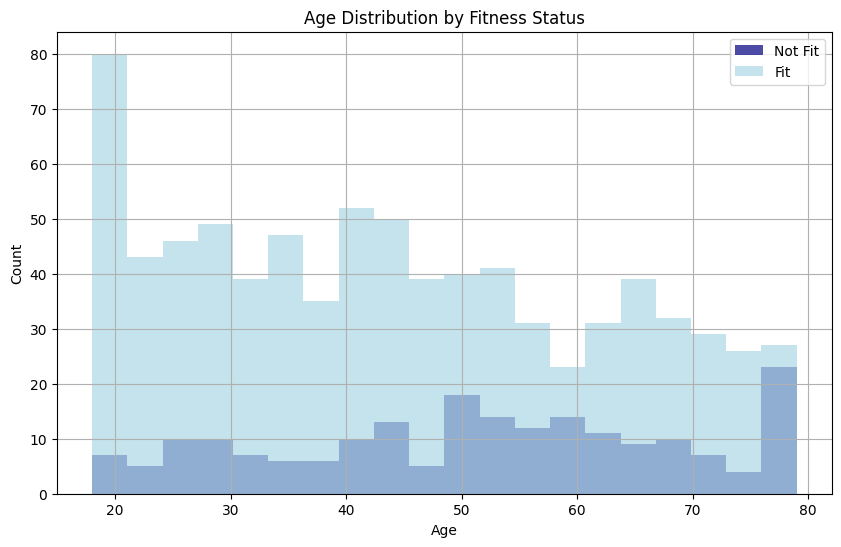

,count,mean,std,min,25%,50%,75%,max
is_fit,,,,,,,,
0,201.0,51.522388,16.985604,18.0,39.0,53.0,64.0,79.0
1,799.0,44.411765,17.409182,18.0,29.0,43.0,58.0,79.0


In [11]:
plt.figure(figsize=(10,6))
sample[sample['is_fit'] == 0]['age'].hist(bins=20, color='navy',
                                          alpha=0.7, label='Not Fit')
sample[sample['is_fit'] == 1]['age'].hist(bins=20, color='lightblue',
                                          alpha=0.7, label='Fit')
plt.title('Age Distribution by Fitness Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

sample.groupby('is_fit')['age'].describe()


# ***Pre-Processing:***

#*Data Cleaning: Outlier Detection and Removal*

###*The Z-score method was used to detect and remove outliers from numeric attributes such as weight_kg, heart_rate, blood_pressure, sleep_hours, and activity_index. Records with Z-scores above ±2 were identified as extreme values and removed based on their deviation from the mean. This technique was applied to reduce skewness, eliminate anomalies, and improve data consistency, ensuring a balanced and reliable dataset (992 rows) for further preprocessing and model training.*

---



In [12]:
from scipy.stats import zscore

sample_preprocessed = sample.copy()

numeric_data = sample_preprocessed.select_dtypes(include=['number'])
specific_columns = numeric_data.drop(columns=['is_fit'])

z_scores = pd.DataFrame(zscore(specific_columns), columns=specific_columns.columns)
threshold = 2

for col in specific_columns.columns:
    outliers = specific_columns[(abs(z_scores[col]) > threshold)]
    print(f"Outliers in '{col}':")
    print(outliers[col].values)
    print()

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)

Outliers in 'age':
[]

Outliers in 'height_cm':
[]

Outliers in 'weight_kg':
[200 250 220 220 220  30 220 220]

Outliers in 'heart_rate':
[ 46.4  45.8  99.6  94.7  46.2 108.7 118.6  46.2 102.3  46.8  46.4  96.1
  96.6  97.2  46.6  98.6  94.8  45.   99.1  98.8  45.   95.9  46.4  46.3
  95.3  45.   46.3  94.7  45.   94.5 103.3  45.   95.4  45.   45.  103.6
 102.2  45.   46.1  46.2  45.   94.7  46.6  98.8  45.   98.2  96.7  46.8
  45. ]

Outliers in 'blood_pressure':
[ 90.   90.   90.  148.8  90.  154.4 151.9  90.   90.2 154.5  90.   90.
 171.2  90.  151.6  90.  155.7  90.  157.9  90.   90.  162.7 150.8  90.4
  90.  154.1  90.4  90.5 149.7 159.1 151.5 155.5  90.  164.6 157.9 150.4
  90.   90.  152.7  90.   90.   90.   90.   90.   90.2 151.4  90.   90.
 150.3 156.6 156.2 149.7 148.5 149.5]

Outliers in 'sleep_hours':
[]

Outliers in 'nutrition_quality':
[]

Outliers in 'activity_index':
[1.14 1.14 1.11 1.14 1.06 1.05 1.14 1.01 1.07 1.07 1.01 1.14 1.04 1.07
 1.13 1.07 1.12 1.01 1.05 1.03 1.

In [13]:
numeric_data = sample_preprocessed.select_dtypes(include=['number'])
numeric_data = numeric_data.drop(columns=['is_fit'])

for col in numeric_data.columns:
    mean_value = numeric_data[col].mean()
    differences_from_mean = abs(numeric_data[col] - mean_value)
    max_difference_index = differences_from_mean.idxmax()
    sample_preprocessed = sample_preprocessed.drop(max_difference_index)
    sample_preprocessed = sample_preprocessed.reset_index(drop=True)

print("\nDataFrame after removing outliers from each column:")
print(sample_preprocessed)

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)




DataFrame after removing outliers from each column:
     age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0     56        152         65        69.6           117.0          NaN   
1     69        186         95        60.8           114.8          7.5   
2     32        189         83        60.2           130.1          7.0   
3     60        175         99        58.1           115.8          8.0   
4     38        188         57        81.2           110.6          6.6   
..   ...        ...        ...         ...             ...          ...   
987   36        193        101        88.1           132.9          6.1   
988   79        160         57        55.4           102.4          6.1   
989   42        158        117        74.7           135.2          9.2   
990   76        162         63        82.4           102.0          8.0   
991   51        171         96        79.6           104.3          5.8   

     nutrition_quality  activity_index smokes 

#***Handling Missing Values: Detection***
###*The dataset was checked for missing or incomplete records using the isna() function to ensure data completeness. The analysis showed that only the sleep_hours attribute had 79 missing values. Identifying these gaps early helped ensure that the dataset was properly cleaned and ready for accurate preprocessing and analysis.*


---



In [14]:
rows_with_missing = sample[sample.isna().any(axis=1)]
print("Missing values in each column:")
print(missing_counts)
print("\nRows with missing values:")
display(rows_with_missing)


Missing values in each column:
age                   0
height_cm             0
weight_kg             0
heart_rate            0
blood_pressure        0
sleep_hours          79
nutrition_quality     0
activity_index        0
smokes                0
gender                0
is_fit                0
dtype: int64

Rows with missing values:


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
8,41,162,45,59.4,112.5,NaN,2.47,4.62,no,M,1
16,61,198,77,46.4,126.9,NaN,5.47,4.89,no,F,1
22,61,162,72,80.2,113.9,NaN,8.56,4.47,no,M,1
27,67,194,74,68.5,108.8,NaN,2.74,3.42,no,F,1
...,...,...,...,...,...,...,...,...,...,...,...
959,79,153,74,96.7,130.9,NaN,6.32,2.62,no,M,0
960,51,177,109,81.1,97.1,NaN,7.17,4.78,yes,F,0
961,59,163,94,72.6,156.2,NaN,7.38,2.98,yes,M,0
981,37,161,78,70.4,103.8,NaN,3.98,2.42,yes,M,0




#***Handling Missing Values: Imputation***

###*To handle the missing entries in the `sleep_hours` column, the mean imputation method was applied. The missing values were replaced with the column’s mean to maintain the overall data distribution and avoid introducing bias. This approach preserved the dataset’s consistency and ensured that all 11 attributes remained complete for accurate analysis and modeling.*


---



In [15]:
mean_value = sample_preprocessed['sleep_hours'].mean()

sample_preprocessed['sleep_hours'] = sample_preprocessed['sleep_hours'].fillna(value=mean_value)

missing_values = sample_preprocessed.isnull().sum()
print('Missing values per column:')
print(missing_values)

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)



Missing values per column:
age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
is_fit               0
dtype: int64


#***Class Distribution after Data Cleaning:***
###*The pie chart illustrates the class distribution of the dataset after cleaning, with 79.7% of the participants classified as Fit, and the remaining 20.3% classified as Not Fit.*

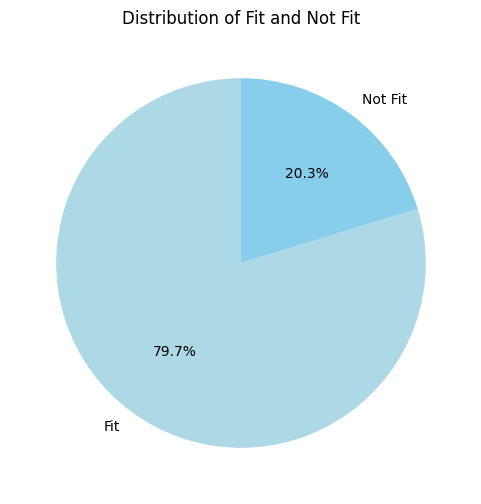

is_fit
1    791
0    201
Name: count, dtype: int64


In [16]:
isfit_counts = sample_preprocessed['is_fit'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(isfit_counts, labels=['Fit', 'Not Fit'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'skyblue'])
plt.title('Distribution of Fit and Not Fit')
plt.show()
print(isfit_counts)



#***Data Transformation: BMI Aggregation***
###*The attributes **height_cm** and **weight_kg** were aggregated to create **BMI** using the formula *weight_kg / (height_m²)* after converting height to meters. This was applied to simplify the dataset, reduce feature count, and provide a clearer, single health indicator strongly related to **is_fit**, improving interpretability and analysis efficiency.*


In [17]:
sample_preprocessed["height_m"] = sample_preprocessed["height_cm"] / 100

sample_preprocessed["BMI"] = sample_preprocessed["weight_kg"] / (sample_preprocessed["height_m"] ** 2)

sample_preprocessed["BMI"] = sample_preprocessed["BMI"].round(2)

sample_preprocessed.drop(columns=["height_m"], inplace=True)

print ("Updated Data with BMI Column:")

display(sample_preprocessed[["height_cm", "weight_kg", "BMI"]])

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)

Updated Data with BMI Column:


,height_cm,weight_kg,BMI
0,152,65,28.13
1,186,95,27.46
2,189,83,23.24
3,175,99,32.33
4,188,57,16.13
...,...,...,...
987,193,101,27.11
988,160,57,22.27
989,158,117,46.87
990,162,63,24.01


#***Data Normalization: Feature Scaling***
###*In this step, **Min-Max normalization** was applied to numerical attributes — including *height_cm, weight_kg, heart_rate, blood_pressure, sleep_hours, activity_index, nutrition_quality,* and *BMI*. This technique rescales values to a **0–1 range** to ensure consistency across features, reduce the influence of large-scale variables, and improve model performance. It was applied to enhance comparability and maintain balance among features during analysis and machine learning.*


In [18]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'activity_index', 'nutrition_quality', 'BMI']

scaler = MinMaxScaler()
sample_preprocessed[columns_to_normalize] = scaler.fit_transform(sample_preprocessed[columns_to_normalize])

sample_preprocessed[columns_to_normalize] = sample_preprocessed[columns_to_normalize].round(8)

print("Normalized Data:")
display(sample_preprocessed[columns_to_normalize])

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)


Normalized Data:


,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,activity_index,nutrition_quality,BMI
0,0.040816,0.159091,0.334239,0.332512,0.453501,0.743719,0.231621,0.186852
1,0.734694,0.295455,0.214674,0.305419,0.437500,0.547739,0.876133,0.180168
2,0.795918,0.240909,0.206522,0.493842,0.375000,0.670854,0.615307,0.138069
3,0.510204,0.313636,0.177989,0.317734,0.500000,0.959799,0.994965,0.228751
4,0.775510,0.122727,0.491848,0.253695,0.325000,0.992462,0.845921,0.067139
...,...,...,...,...,...,...,...,...
987,0.877551,0.322727,0.585598,0.528325,0.262500,0.354271,0.301108,0.176676
988,0.204082,0.122727,0.141304,0.152709,0.262500,0.045226,0.628399,0.128392
989,0.163265,0.395455,0.403533,0.556650,0.650000,0.030151,0.942598,0.373803
990,0.244898,0.150000,0.508152,0.147783,0.500000,0.211055,0.507553,0.145750


#***Age Discretization***
###*The **age** attribute was discretized into **three categories** using equal-width binning to represent different life stages — *Youth*, *Adult*, and *Senior*. This technique was applied to simplify analysis and reduce variability by converting continuous age values into grouped ranges, improving interpretability and aiding pattern detection in relation to the target feature **is_fit**.*


In [19]:

column_to_discretize = 'age'
num_bins = 3

sample_preprocessed['discretized_' + column_to_discretize] = pd.cut(
    sample_preprocessed[column_to_discretize],
    bins=num_bins,
    labels=False
)

print("Original DataFrame with discretized column:")
print(sample_preprocessed[[column_to_discretize, 'discretized_' + column_to_discretize]])

sample_preprocessed.drop(columns=[column_to_discretize], inplace=True)

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)



Original DataFrame with discretized column:
     age  discretized_age
0     56                1
1     69                2
2     32                0
3     60                2
4     38                0
..   ...              ...
987   36                0
988   79                2
989   42                1
990   76                2
991   51                1

[992 rows x 2 columns]


#***Feature Selection: Correlation-Based Filtering***
###*In this step, the correlation between each feature and the target variable is_fit was calculated to identify the most influential predictors. The top five features — activity_index, nutrition_quality, discretized_age, sleep_hours, and BMI — were selected based on their highest absolute correlation values. This method enhances model efficiency and interpretability by retaining only the most relevant attributes while minimizing redundancy.*

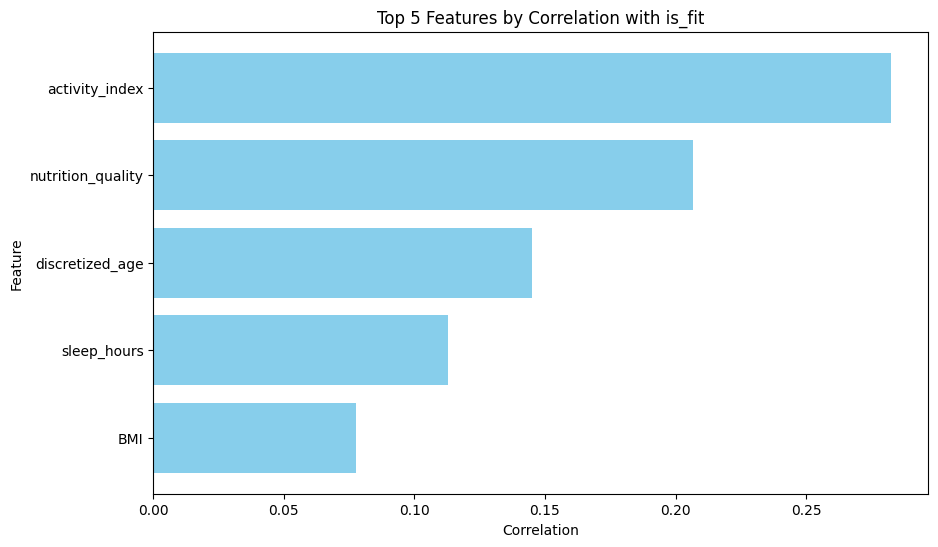

In [20]:
warnings.filterwarnings("ignore")

featureSelection = sample_preprocessed.copy()

X = featureSelection.drop('is_fit', axis=1)
y = featureSelection['is_fit']

X = X.apply(pd.to_numeric, errors='coerce')
X_temp = X.fillna(X.mean())

correlations = X_temp.corrwith(y).abs()

correlation_scores = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})

top_5_features = correlation_scores.nlargest(5, 'Correlation')['Feature'].tolist()

plt.figure(figsize=(10, 6))
plt.barh(top_5_features, correlation_scores.set_index('Feature').loc[top_5_features]['Correlation'], color='skyblue')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Top 5 Features by Correlation with is_fit')
plt.gca().invert_yaxis()
plt.show()

featureSelection = featureSelection[top_5_features + ['is_fit']]
featureSelection.to_csv('Preprocessed_dataset.csv', index=False)


#*Preprocessing Results Summary*

###*After applying the preprocessing techniques, the dataset became cleaner, more consistent, and ready for analysis. Missing values in the sleep_hours attribute were filled using the mean imputation method, ensuring no data loss while maintaining realistic averages. Outlier detection and removal eliminated extreme values in attributes like weight_kg and heart_rate, improving data reliability. BMI was calculated from height_cm and weight_kg, adding a valuable health indicator. The age attribute was discretized into three categories (Youth, Adult, Senior) to simplify interpretation and highlight demographic patterns. Normalization (Min-Max Scaling) was then applied to numerical attributes such as height_cm, heart_rate, activity_index, and BMI, ensuring all features were on the same scale for fair model comparison. Finally, feature selection using correlation analysis identified the most relevant predictors (activity_index, nutrition_quality, discretized_age, sleep_hours, and BMI), reducing redundancy and focusing on impactful variables*
###*Overall, these steps improved data quality, interpretability, and model readiness.*

#*Snapshot of Raw dataset VS. Prcessed dataset*

In [21]:


sample_cols = [
    "age","height_cm","weight_kg","heart_rate","blood_pressure",
    "sleep_hours","nutrition_quality","activity_index","smokes","gender","is_fit"
]

sample_preprocessed_cols = [
    "discretized_age","height_cm","weight_kg","heart_rate","blood_pressure",
    "sleep_hours","nutrition_quality","activity_index","BMI","is_fit"
]


print("RAW shape:", sample.shape)
print("PREPROCESSED shape:", sample_preprocessed.shape)


print("\n=== SNAPSHOT • RAW DATASET (first 5 rows) ===")
display(sample[sample_cols].head(5))

print("\n=== SNAPSHOT • PREPROCESSED DATASET (first 5 rows) ===")
display(sample_preprocessed[sample_preprocessed_cols].head(5))


RAW shape: (1000, 11)
PREPROCESSED shape: (992, 12)

=== SNAPSHOT • RAW DATASET (first 5 rows) ===


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,no,F,1
2,32,189,83,60.2,130.1,7.0,6.18,3.68,no,M,1
3,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1
4,38,188,57,81.2,110.6,6.6,8.47,4.96,no,M,1



=== SNAPSHOT • PREPROCESSED DATASET (first 5 rows) ===


,discretized_age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,BMI,is_fit
0,1,0.040816,0.159091,0.334239,0.332512,0.453501,0.231621,0.743719,0.186852,1
1,2,0.734694,0.295455,0.214674,0.305419,0.437500,0.876133,0.547739,0.180168,1
2,0,0.795918,0.240909,0.206522,0.493842,0.375000,0.615307,0.670854,0.138069,1
3,2,0.510204,0.313636,0.177989,0.317734,0.500000,0.994965,0.959799,0.228751,1
4,0,0.775510,0.122727,0.491848,0.253695,0.325000,0.845921,0.992462,0.067139,1
